# Program to train a machine to find a sonar signal is from rock or a mine

# Data Set Information:

The file "sonar.csv" contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file "sonar.csv" contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the data frame
df=pd.read_csv("sonar.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


# Renaming the target attribute and converting the target value from object to integer for easy referrence

In [3]:
#renaming the target name as Target
df.rename(columns={60:"Target"},inplace=True)
df


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
df['Target'] = df['Target'].map({'R': 0, 'M': 1}).astype(int)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


# Getting basic statistics from the dataset

In [5]:
#counting number of rows and columns
df.shape

(208, 61)

In [6]:
#datatypes
df.dtypes

0         float64
1         float64
2         float64
3         float64
4         float64
           ...   
56        float64
57        float64
58        float64
59        float64
Target      int32
Length: 61, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [8]:
#column names(attributes)
df.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,       10,       11,       12,       13,
             14,       15,       16,       17,       18,       19,       20,
             21,       22,       23,       24,       25,       26,       27,
             28,       29,       30,       31,       32,       33,       34,
             35,       36,       37,       38,       39,       40,       41,
             42,       43,       44,       45,       46,       47,       48,
             49,       50,       51,       52,       53,       54,       55,
             56,       57,       58,       59, 'Target'],
      dtype='object')

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


KEY OBSERVATION:
    
    1) There were no missing values
    
    2) the mean and the median(50%) is almost similar
    
    3)No much difference between the 75% and the max. 
    
    so the outliers are not there,but still we will validate it further

# Exploring data variables

In [10]:
df.Target.value_counts()

1    111
0     97
Name: Target, dtype: int64

0=Rock   1=mine

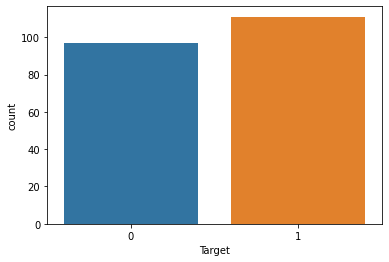

In [11]:
#graphical representation for classification
sns.countplot(x="Target",data=df)

we observe that the target rock and mine are almost equal

# finding missing value

In [12]:
#checking missing value
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
56        0
57        0
58        0
59        0
Target    0
Length: 61, dtype: int64

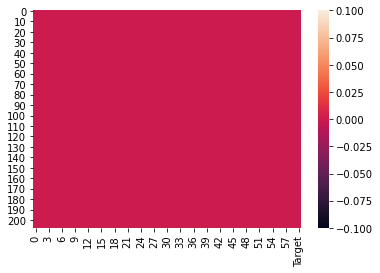

In [13]:
#missing value in data visuvalization
sns.heatmap(df.isnull())

obervation:    there are no null values(NaN) in the dataset

# EDA

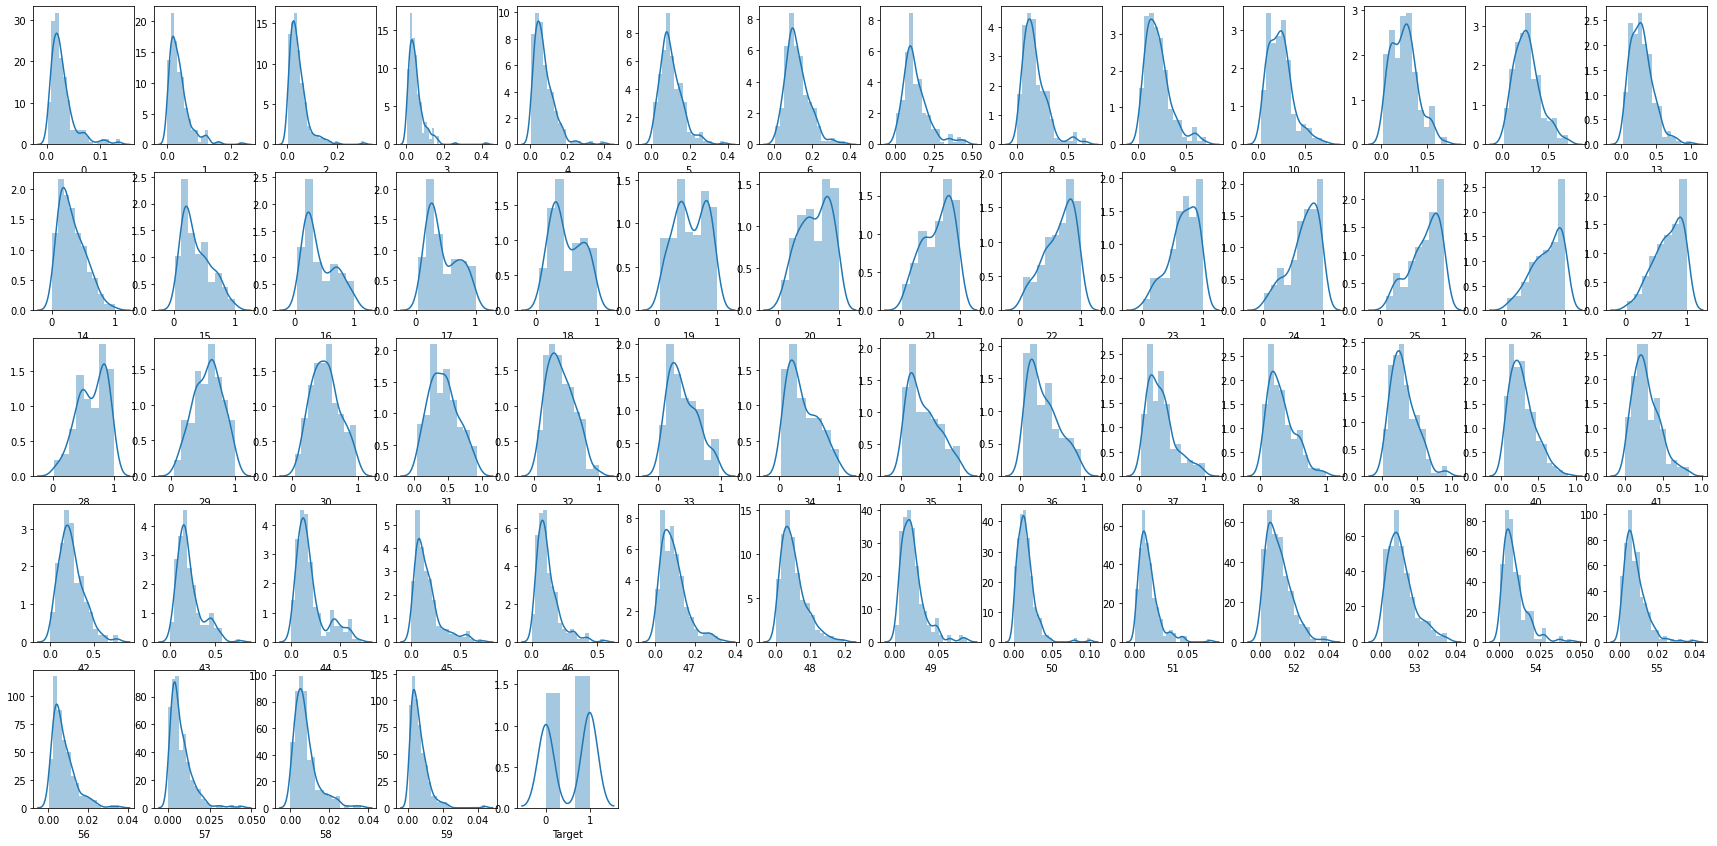

In [14]:
#univariate analysis
collist=df.columns.values
ncol=14
nrow=10
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

from displacement plot we observe that there  are many variable which is not with normal distribution and may have contain skewdness 

# Correlation

In [15]:

cor=df.corr()
cor

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Target
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078,0.271694
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761,0.231238
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948,0.192195
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626,0.250638
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710,0.222232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,0.313725,0.280341,0.380819,0.340254,0.219395,0.161333,0.186324,0.267212,0.193963,0.140327,...,0.191264,0.308197,0.361443,0.387204,0.515154,1.000000,0.509805,0.431295,0.287219,0.000933
57,0.368132,0.353042,0.334108,0.344865,0.238793,0.203986,0.242646,0.287603,0.231745,0.212277,...,0.309673,0.370764,0.404117,0.503465,0.463659,0.509805,1.000000,0.550235,0.329827,0.184191
58,0.357116,0.352200,0.425047,0.420266,0.290982,0.220573,0.183578,0.194400,0.097293,0.058273,...,0.298711,0.346095,0.447118,0.453658,0.430804,0.431295,0.550235,1.000000,0.642872,0.130826
59,0.347078,0.358761,0.373948,0.400626,0.253710,0.178158,0.222493,0.146216,0.095243,0.097358,...,0.195379,0.280780,0.283471,0.264399,0.349449,0.287219,0.329827,0.642872,1.000000,0.090055


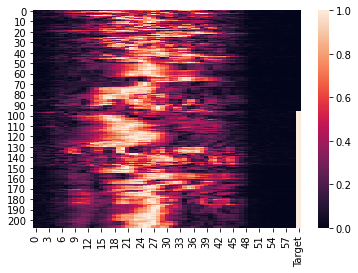

In [16]:
sns.heatmap(df)

from the heatmap we can observe that all data value is in range of 0-1 and there is no negatively correlated value.

# preparing dataset for model training

seperating independent and dependent variable


In [17]:
x=df.drop("Target",axis=1)
y=df["Target"]

splitting the testing and training data

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [19]:
x_train.shape

(162, 60)

In [20]:
y_train.shape

(162,)

In [21]:
x_test.shape

(46, 60)

In [22]:
y_test.shape

(46,)

# finding best method
There are various algorithms to predict the target variable. Here we will use the following method which will suit for the given data

1) Logical Regression

2)Random forest method

3)Decision Tree Regression

4)support vector regressor

In [23]:
#Logical regression
lg=LogisticRegression()
lg.fit(x_train,y_train)#for Training purpose
lg_pred=lg.predict(x_test)#for Testing purpose
print(lg_pred)
print("\nAccuracy score : ",accuracy_score(y_test,lg_pred)*100)
print("\nConfussion matrix : ",confusion_matrix(y_test,lg_pred))
print("\nclassification report : ",classification_report(y_test,lg_pred))

[1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1
 0 0 1 0 0 0 1 0 1]

Accuracy score :  82.6086956521739

Confussion matrix :  [[17  2]
 [ 6 21]]

classification report :                precision    recall  f1-score   support

           0       0.74      0.89      0.81        19
           1       0.91      0.78      0.84        27

    accuracy                           0.83        46
   macro avg       0.83      0.84      0.82        46
weighted avg       0.84      0.83      0.83        46



SVC Regressor

In [24]:
#finding best parameters for svr
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
parameters={"kernel":["linera","poly","rbf","sigmoid"]}
sv=SVR()
clf=GridSearchCV(sv,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)




{'kernel': 'poly'}


In [25]:
#SVR METHOD
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
sv=SVR(kernel="rbf")
sv.fit(x_train,y_train)
sv.score(x_train,y_train)
pred_vector=sv.predict(x_test)
svs=r2_score(y_test,pred_vector)
print("r2score : " ,svs*100)
svscore=cross_val_score(sv,x,y,cv=3)
svc=svscore.mean()
print("cross value score : ",svc*100)

r2score :  51.556558027280865
cross value score :  -21.457317266807856


RandomForestRegressor

In [26]:
#Finding best parameters for RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
parameters={"criterion":["mse","friedman_mse","mae"],"n_estimators":[100,200,300]}
rfc=RandomForestRegressor()
clf=GridSearchCV(rfc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 100}


In [27]:
#RandomForestRegressor Method
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=RandomForestRegressor(criterion="mae",n_estimators=200)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rf_pred=rf.predict(x_test)
rf_pred
r2score=r2_score(y_test,rf_pred)
cvscore=cross_val_score(rf,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100},\nand difference={(r2score*100)-(cvscore*100)}")


Accuracy=37.59669590643274,
cross_value_score=36.20768052637722,
and difference=1.3890153800555254


DecisionTreeRegressor

In [28]:
#Finding best parameters for DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
parameters={"criterion":["mse","friedman_mse","mae"],"splitter":["best","random"]}
dr=DecisionTreeRegressor()
clf=GridSearchCV(dr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'random'}


In [29]:
#DessionTreeRegressor Method
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
rf=DecisionTreeRegressor(criterion="mse",splitter="random")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=rf.predict(x_test)
pred
r2score=r2_score(y_test,pred)
cvscore=cross_val_score(rf,x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100},\nand difference={(r2score*100)-(cvscore*100)}")




Accuracy=10.331384015594525,
cross_value_score=-14.419701213818865,
and difference=24.75108522941339


 Neither RandomForestRegressor nor DecisionTreeRegressor did very well, more feature engineering is needed.
 so we take logistic regression   

# HYPERPARAMETER TUNING

In [30]:
#creating parameter list to pass in gridsearch CV
param_grid_lr = [{"C": [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0]}]




In [31]:
from sklearn.model_selection import GridSearchCV
GCV=GridSearchCV(lg, param_grid = param_grid_lr,scoring='accuracy',cv=10,refit=True,n_jobs=1)
GCV.fit(x_train,y_train)
GCV.best_estimator_#finding best estimator
GCV_pred=GCV.best_estimator_.predict(x_test)
print("Final accuracy = ",r2_score(y_test,GCV_pred)*100)

Final accuracy =  19.298245614035082


# Serialization

In [32]:
import joblib
joblib.dump(lg,"sonar.rockvsmine.pkl")


['sonar.rockvsmine.pkl']

# CONCLUSION

In [33]:
import numpy as np
a=np.array(y_test)
a

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0])

In [34]:
df_com=pd.DataFrame({"original":a,"Predicted":pred},index=range(len(a)))
df_com

,original,Predicted
0,1,1.0
1,0,0.0
2,0,0.0
3,0,0.0
4,1,0.0
5,0,0.0
6,1,1.0
7,1,1.0
8,0,0.0
9,1,1.0
